In [17]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager

In [18]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54

def kilo(value):
    return value/1000

def Mega(value):
    return value/1000000

# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))


loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

def D2K(val): 
    return val + 273.15 
def K2D(val):
    return val - 273.15

# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...
}


## CSV

In [19]:
# csv 파일
exergy_OB_data = pd.read_csv('../data_BL/exergy_EXBL.csv')

## Time step

In [20]:
# time step, 시간 축 설정
t = 600
hour_to_sec = 3600
time_list = [t*i/hour_to_sec for i in range(len(exergy_OB_data.iloc[:,[0]]))]
duration = len((exergy_OB_data.iloc[:,[0]]))*t/hour_to_sec

summer_start_day = 4920
summer_end_day = 5088

winter_start_day = 24
winter_end_day = 192

## Exergy Plot

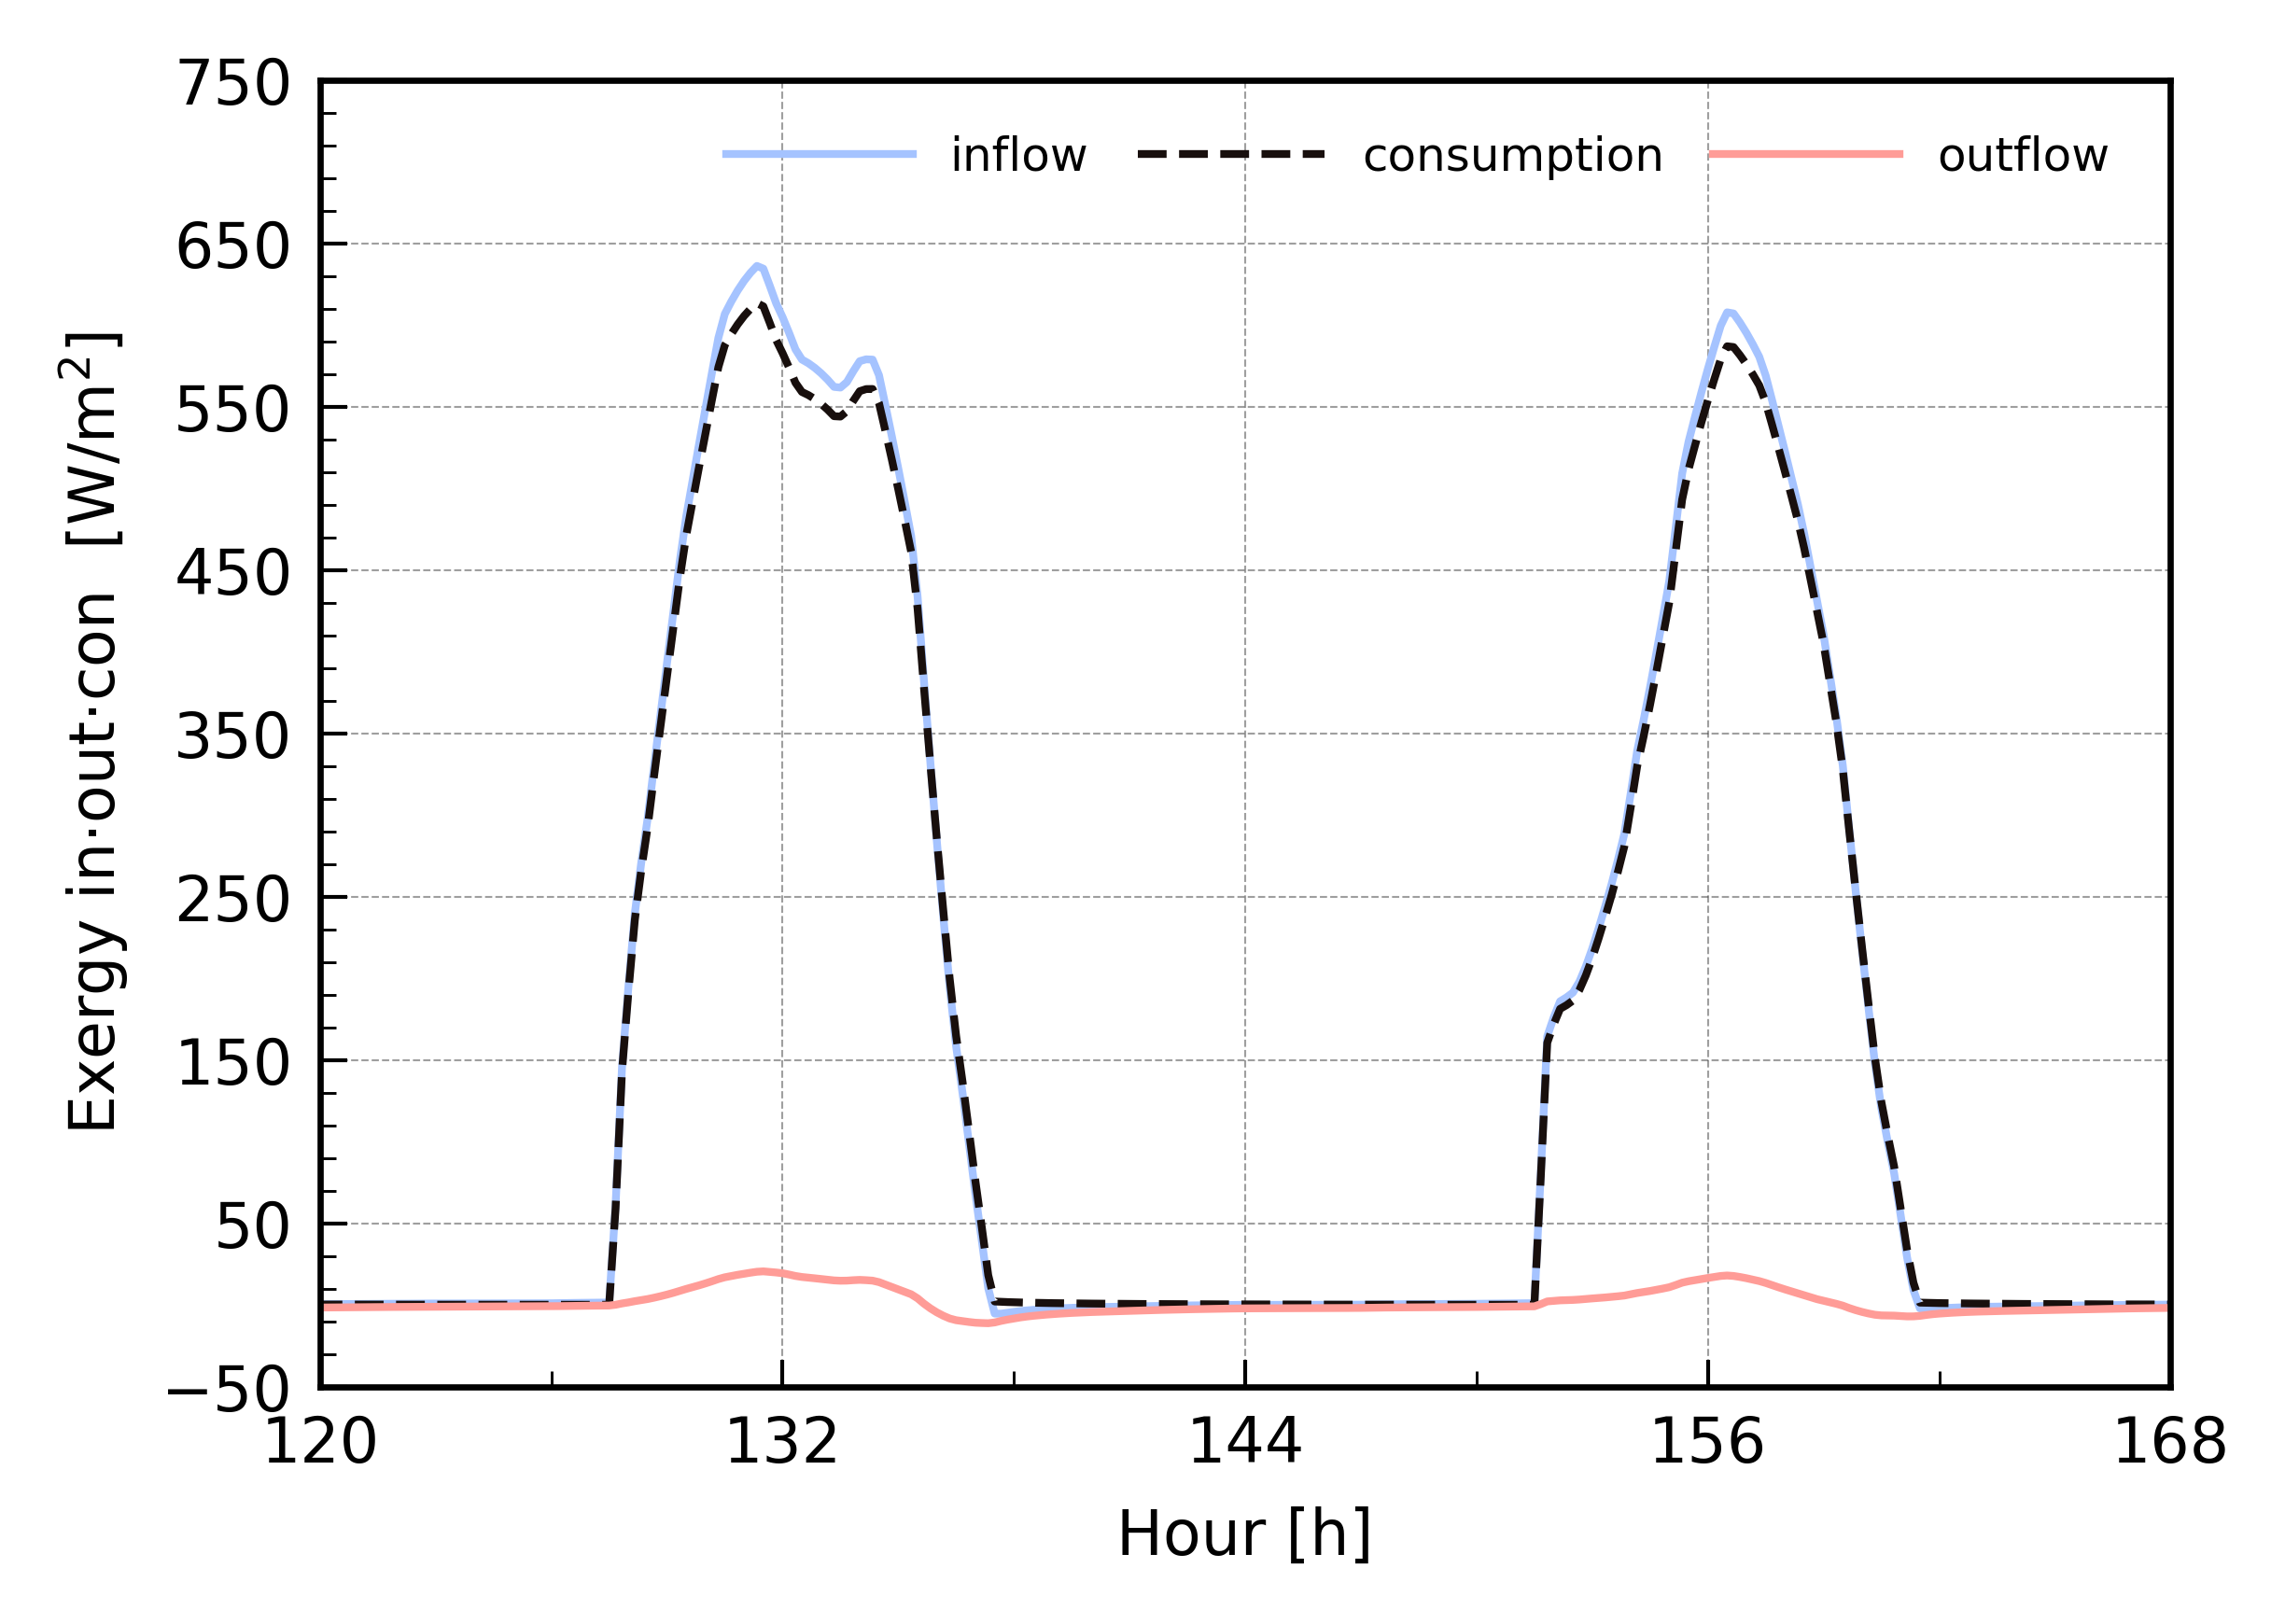

In [22]:
from cProfile import label

N = 3 # 노드 개수 (플랏 몇 번 그릴 건지)

# decimal index 소숫점 제거해주기 
d_idx = 10

nrows = 1
ncols = 1
nfigs = nrows*ncols

fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=False, 
    figsize=(cm2in(10),cm2in(7)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    )


plot_x = time_list # 노드 바꾸면 추가해야 됨
color = ['#A5C3FF', '#180f0d', '#FF9C97', '#ac2a1a', '#c46d1c','#ffe100',]
plot_label = ['inflow', 'consumption', 'outflow']
line_label = ['-', '--', '-', '-', '-', '-']
y = exergy_OB_data.iloc[:,:3]


# tick settings 
xmin = [winter_end_day-48]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [winter_end_day]*nfigs #tick max value
xint = [12]*nfigs #tick Y_int
xmar = [0]*nfigs

ymin = [-50]*nfigs
ymax = [750]*nfigs
yint = [100]*nfigs
ymar = [0]*nfigs

xlabel = ["Hour [h]"]*nfigs
ylabel = ["Exergy in·out·con $~\mathrm{[W/m^2]}$"]*nfigs

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for i in range(N):  
        # figure index 
            idx = ncols*ridx + cidx
        
            ax[ridx, cidx].plot(
            plot_x,
            y.iloc[:,[i]],
            c = color[i],
            lw = LW[4],
            label = plot_label[i],
            linestyle = line_label[i],
            )
        
        # # 라벨 설정
        ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
        
        # 축 위치 설정 
        ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx]))
        ax[ridx, cidx].set_xticklabels(["120", "132", "144", "156", "168"], fontsize=FS)
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
        
        # x,y 값 제한 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0.1)
        
        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        
        # 그리드 설정 
        ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
        
        # legend 
        handles, labels = ax[ridx,cidx].get_legend_handles_labels()
        legorder1 = range(len(handles))
        ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                            [labels[idx] for idx in legorder1], 
                            loc='upper right', ncol=3, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                            edgecolor='None', facecolor='None',
                            fontsize=6, fancybox=False, 
                            columnspacing= 1.05, labelspacing=0.6,
                            handlelength= 4)
    
        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.8)
                ax[ridx,cidx].spines[k].set_color('k')  
                
# Margin adjustment.
fig.align_labels()
fig.tight_layout(pad=0.2, h_pad=0.2)
plt.subplots_adjust(hspace=0.35, wspace=0.35)


## inflow plot

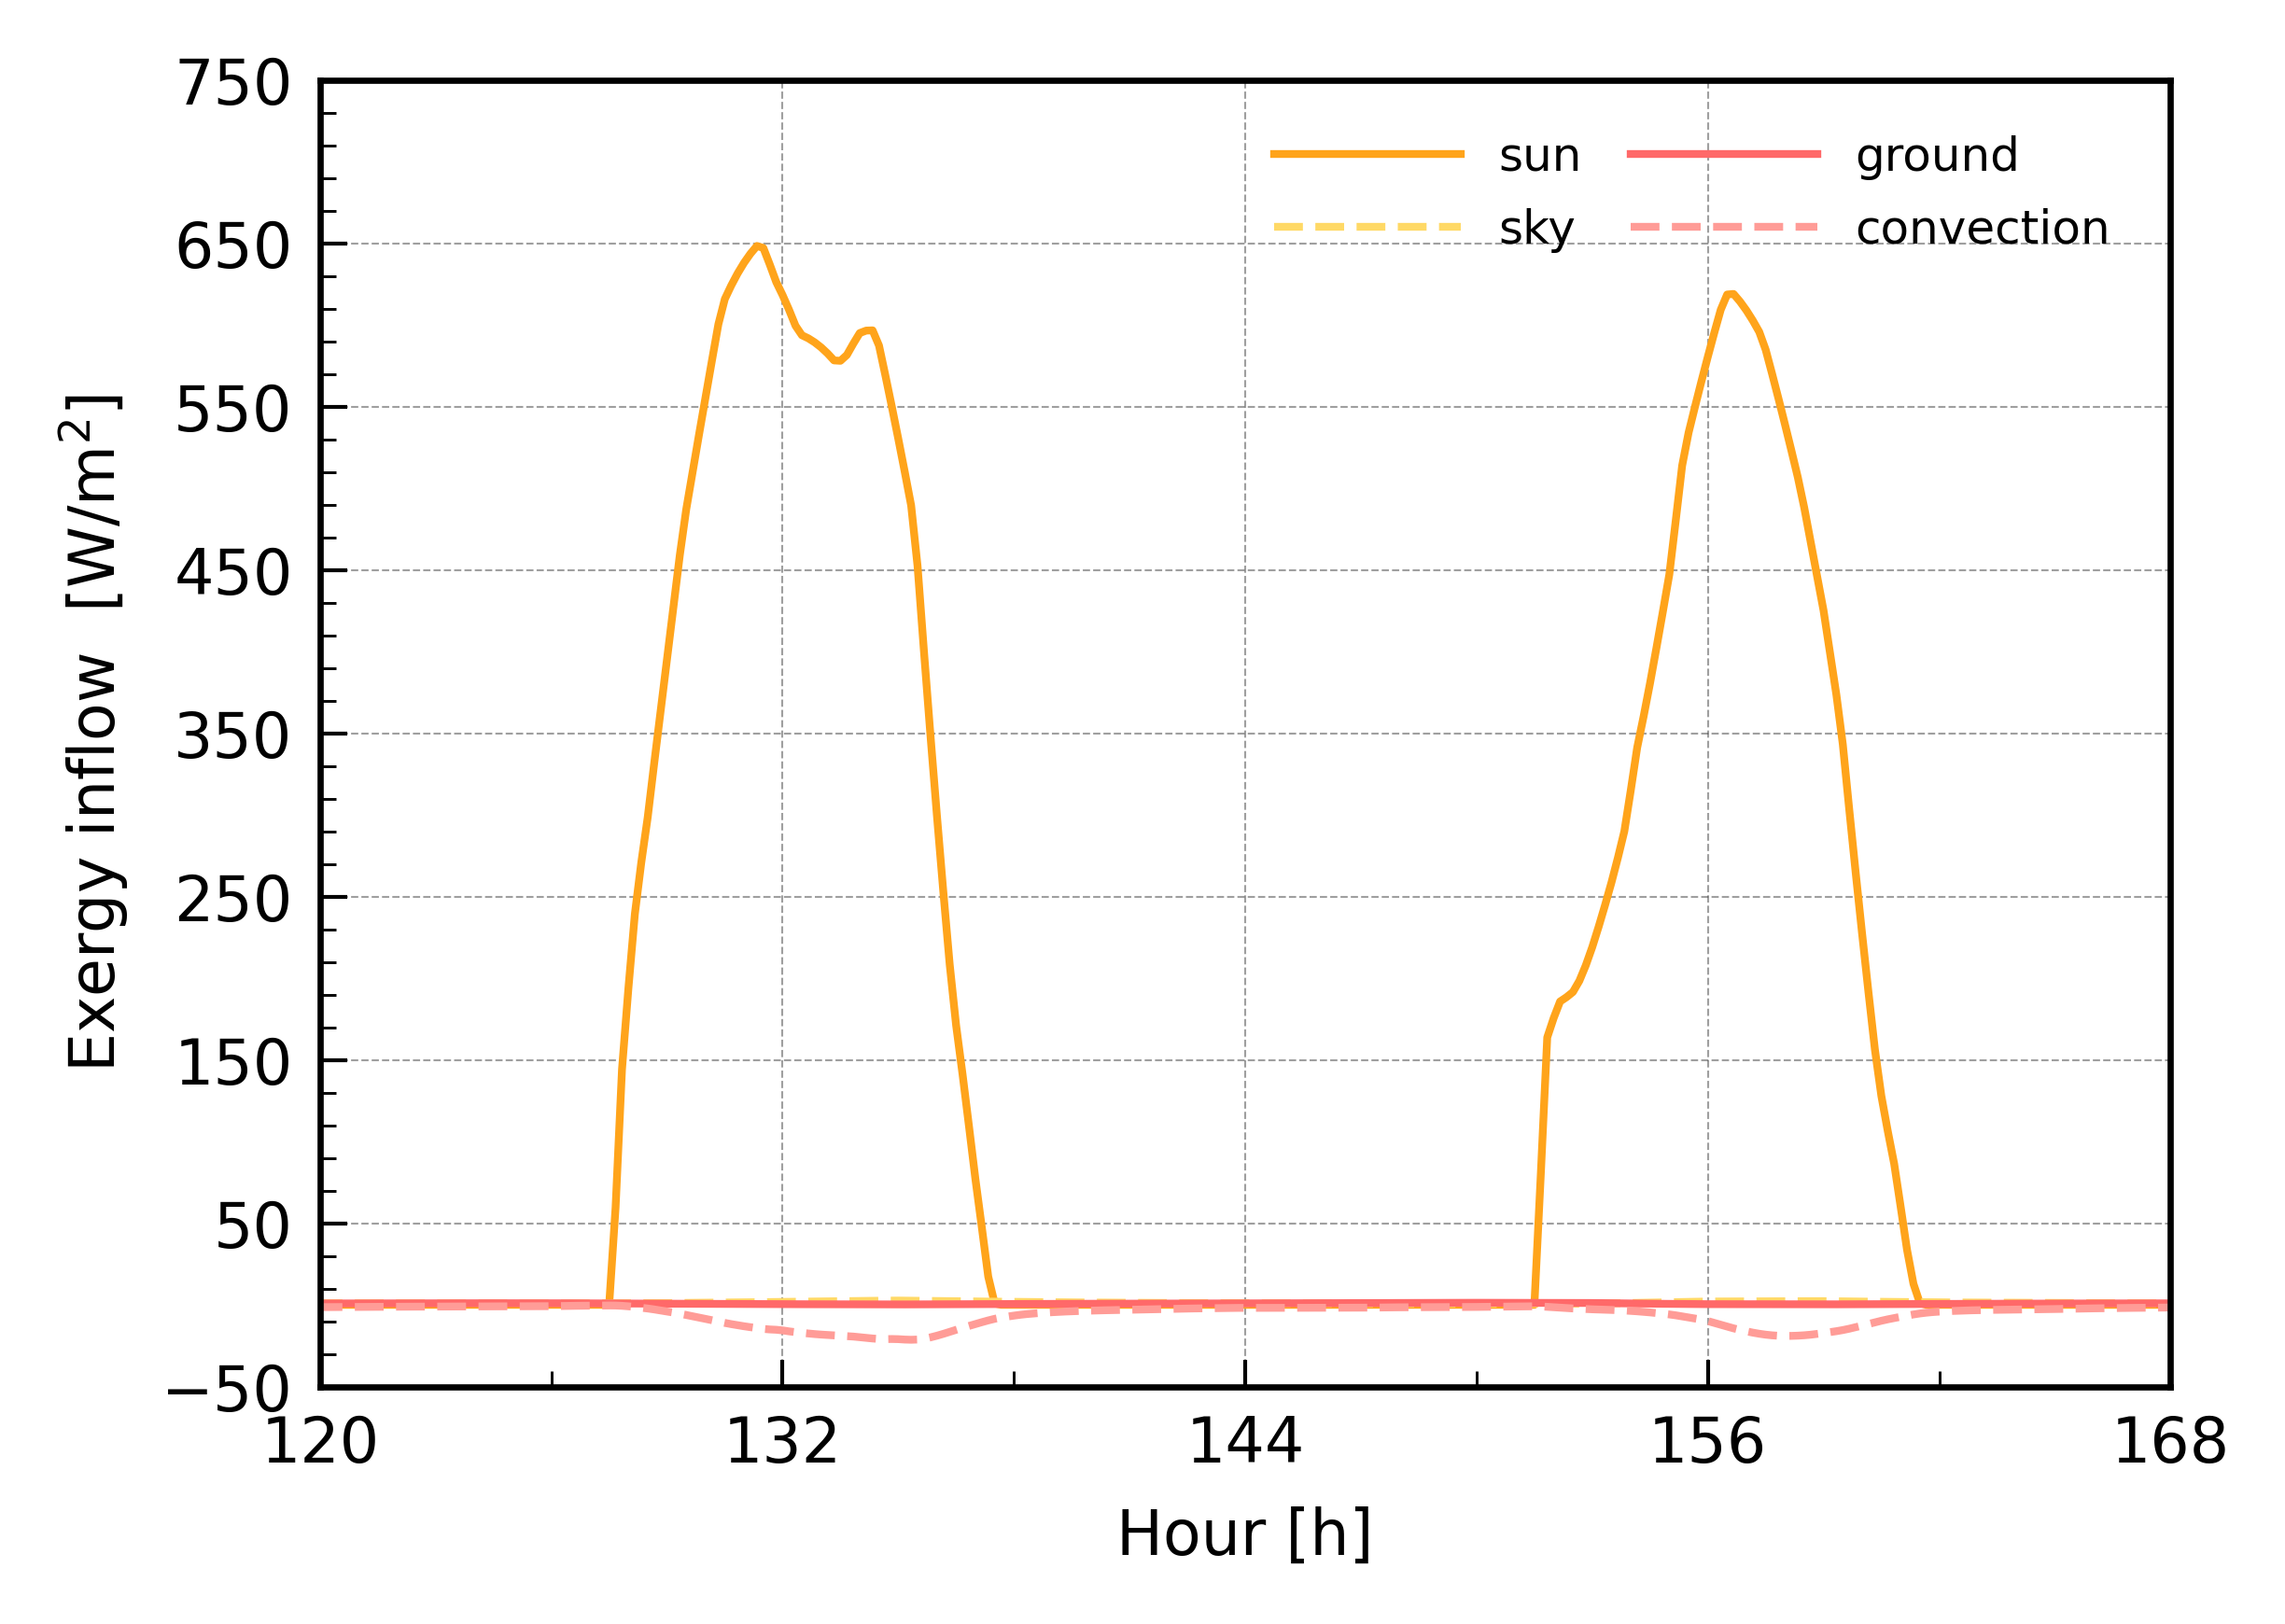

In [26]:
from cProfile import label

N = 4 # 노드 개수 (플랏 몇 번 그릴 건지)

# decimal index 소숫점 제거해주기 
d_idx = 10

nrows = 1
ncols = 1
nfigs = nrows*ncols

fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=False, 
    figsize=(cm2in(10),cm2in(7)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    )

y = exergy_OB_data.iloc[:,3:]
plot_x = time_list # 노드 바꾸면 추가해야 됨
color = ['#FFA41B', '#FFD966', '#FF6969', '#FF9C97', '#ac2a1a', '#c46d1c','#ffe100',]
plot_label = ['sun', 'sky', 'ground', 'convection']
line_label = ['-', '--', '-', '--', '-', '-']


# tick settings 
xmin = [winter_end_day-48]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [winter_end_day]*nfigs #tick max value
xint = [12]*nfigs #tick Y_int
xmar = [0]*nfigs

ymin = [-50]*nfigs
ymax = [750]*nfigs
yint = [100]*nfigs
ymar = [0]*nfigs

xlabel = ["Hour [h]"]*nfigs
ylabel = ["Exergy inflow $~\mathrm{[W/m^2]}$"]*nfigs

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for i in range(N):  
        # figure index 
            idx = ncols*ridx + cidx
        
            ax[ridx, cidx].plot(
            plot_x,
            y.iloc[:,[i]],
            c = color[i],
            lw = LW[4],
            label = plot_label[i],
            linestyle = line_label[i],
            )
        
        # # 라벨 설정
        ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
        
        # 축 위치 설정 
        ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx]))
        ax[ridx, cidx].set_xticklabels(["120", "132", "144", "156", "168"], fontsize=FS)
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
        
        # x,y 값 제한 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0.1)
        
        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        
        # 그리드 설정 
        ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
        
        # legend 
        handles, labels = ax[ridx,cidx].get_legend_handles_labels()
        legorder1 = range(len(handles))
        ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                            [labels[idx] for idx in legorder1], 
                            loc='upper right', ncol=2, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                            edgecolor='None', facecolor='None',
                            fontsize=6, fancybox=False, 
                            columnspacing= 1.05, labelspacing=0.6,
                            handlelength= 4)
    
        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.8)
                ax[ridx,cidx].spines[k].set_color('k')  
                
# Margin adjustment.
fig.align_labels()
fig.tight_layout(pad=0.2, h_pad=0.2)
plt.subplots_adjust(hspace=0.35, wspace=0.35)